In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize
import pickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
totalpop = [420697,443569,344450,526877,899111,339399,419797,308499,140361,547523,354750,479505,287613,666399,278815,193899,166374,379199,356465,195082,407864,321720,201739,411617,469439,465691]


In [3]:

num_comparts = 26
max_eval = 500
def deriv2(y, t, N, beta_I, gamma_I):
    S = y[0:num_comparts*1]
    E = y[num_comparts*1:num_comparts*2]
    I = y[num_comparts*3:num_comparts*4]
    R = y[num_comparts*6:num_comparts*7]
    UR = y[num_comparts*7:num_comparts*8]
    for i in range(num_comparts):
        globals()['dS%sdt' % i] = -S[i]*np.sum(beta_I(t)[:,i]*(I/N))
        globals()['dI%sdt' % i] = S[i]*np.sum(beta_I(t)[:,i]*(I/N)) - (gamma_I(t))*I[i]
        globals()['dR%sdt' % i] = gamma_I(t)*I[i]
    return dS0dt,dS1dt,dS2dt,dS3dt,dS4dt,dS5dt,dS6dt,dS7dt, dS8dt,dS9dt,dS10dt,dS11dt,dS12dt,dS13dt,dS14dt,dS15dt, dS16dt,dS17dt,dS18dt,dS19dt,dS20dt,dS21dt,dS22dt,dS23dt, dS24dt,dS25dt, dI0dt,dI1dt,dI2dt,dI3dt,dI4dt,dI5dt,dI6dt,dI7dt, dI8dt,dI9dt,dI10dt,dI11dt,dI12dt,dI13dt,dI14dt,dI15dt, dI16dt,dI17dt,dI18dt,dI19dt,dI20dt,dI21dt,dI22dt,dI23dt, dI24dt,dI25dt, dR0dt,dR1dt,dR2dt,dR3dt,dR4dt,dR5dt,dR6dt,dR7dt, dR8dt,dR9dt,dR10dt,dR11dt,dR12dt,dR13dt,dR14dt,dR15dt, dR16dt,dR17dt,dR18dt,dR19dt,dR20dt,dR21dt,dR22dt,dR23dt, dR24dt,dR25dt


def Model(s2,gi1):
    #N0 = np.array([396357,2228821,1799204,1167286,666081,1048734,1322943,1568950]) # need to change to num_comparts
    S0 = saved[0:num_comparts] #Susceptible
    I0 = saved[num_comparts*1:num_comparts*2] #exposed
    R0 = saved[num_comparts*2:num_comparts*3] #unidentified infectious
    N0 =I0 + R0 + S0 
    y0 = np.append(np.append(S0,I0),R0)
    def gamma_I(t):
        return gi1#*0.195+.005#*np.exp(gi2*t)
    # transmission rate 
    def beta_I(t):
        xx = flowin.copy()
        return (s2)*xx
    ret = odeint(deriv2, y0, t, args=(N0,beta_I, gamma_I))
    dS0dt,dS1dt,dS2dt,dS3dt,dS4dt,dS5dt,dS6dt,dS7dt, dS8dt,dS9dt,dS10dt,dS11dt,dS12dt,dS13dt,dS14dt,dS15dt, dS16dt,dS17dt,dS18dt,dS19dt,dS20dt,dS21dt,dS22dt,dS23dt, dS24dt,dS25dt,dI0dt,dI1dt,dI2dt,dI3dt,dI4dt,dI5dt,dI6dt,dI7dt, dI8dt,dI9dt,dI10dt,dI11dt,dI12dt,dI13dt,dI14dt,dI15dt, dI16dt,dI17dt,dI18dt,dI19dt,dI20dt,dI21dt,dI22dt,dI23dt, dI24dt,dI25dt,dR0dt,dR1dt,dR2dt,dR3dt,dR4dt,dR5dt,dR6dt,dR7dt, dR8dt,dR9dt,dR10dt,dR11dt,dR12dt,dR13dt,dR14dt,dR15dt, dR16dt,dR17dt,dR18dt,dR19dt,dR20dt,dR21dt,dR22dt,dR23dt, dR24dt,dR25dt = ret.T
    return ret.T

In [4]:
def runSIR(beta,gamma,T,initial):
    S = np.zeros((num_comparts,T))
    I = np.zeros((num_comparts,T))
    R = np.zeros((num_comparts,T))
    for t in range(T):
        S[:,t] = initial[0:num_comparts]
        I[:,t] = initial[num_comparts:num_comparts*2]
        R[:,t] = initial[num_comparts*2:num_comparts*3]
        _help = np.zeros(3*num_comparts)
        for i in range(num_comparts):
            _help[i] = initial[i]
            for j in range(num_comparts):
                _help[i] -= beta[j,i]*(initial[i])*initial[num_comparts+j]/totalpop[j]
            #_help[i] = max(_help[i],0)
            _help[num_comparts + i] = initial[num_comparts + i]-gamma*initial[num_comparts + i]
            for j in range(num_comparts):
                _help[num_comparts + i] += (beta[j,i]*(initial[i])*initial[num_comparts+j]/totalpop[j])
            _help[2*num_comparts + i] = initial[2*num_comparts + i]+gamma*initial[num_comparts + i]
        initial = _help
    return S,I,R
#need to set lower & upper bound

In [5]:
#flowin = np.ones((num_comparts,num_comparts))
#ffdata = pd.read_csv('covid-data/mean_df_20210224_20210424.csv')
#flowin = ffdata.values[0:-1,1:-1]
#flowin =np.array([np.array([float(i) for i in j ])for j in flowin])
#flowin = flowin/500
flowin1 = np.ones((num_comparts,num_comparts))
ffdata1 = pd.read_csv('covid-data/mean_df_20200301_20200414.csv')
flowin1 = ffdata1.values[0:-1,1:-1]
flowin1 =np.array([np.array([float(i) for i in j ])for j in flowin1])
flowin1 = flowin1/1200
flowin = flowin1/0.7

In [6]:
N0=np.transpose(totalpop)
I0 = np.ones(num_comparts)
R0 = np.zeros(num_comparts)
S0 = N0 - I0 - R0
initial = np.append(np.append(S0,I0),R0)
results = pickle.load( open( "covid-data/resultscaserateincluded_post.p", "rb" ) )
[s2,s_u2,gi1,gu1,gh1,eta_m,mi1,mu1,mh1,theta_eta,di1,du1,nu1,nuu1,nuuu1,eff1] = results['int1'].x
beta = s2*flowin*7
beta1 = s2*flowin1*7
gamma = gi1*7

/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_37717/967228251.py:6: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  results = pickle.load( open( "covid-data/resultscaserateincluded_post.p", "rb" ) )


In [18]:
T=40
S,I,R = runSIR(beta,gamma,T,initial)
SS = np.sum(S,axis=0)
II = np.sum(I,axis=0)
RR = np.sum(R,axis=0)
N0=np.transpose(totalpop)
I0 = np.ones(num_comparts)
R0 = np.zeros(num_comparts)
S0 = N0 - I0 - R0
initial = np.append(np.append(S0,I0),R0)
S_,I_,R_ = runSIR(beta1,gamma,T,initial)
SS_ = np.sum(S_,axis=0)
II_ = np.sum(I_,axis=0)
RR_ = np.sum(R_,axis=0)
t = np.linspace(0, T-1, T)

In [19]:
np.sum(S,axis=0).shape

(40,)

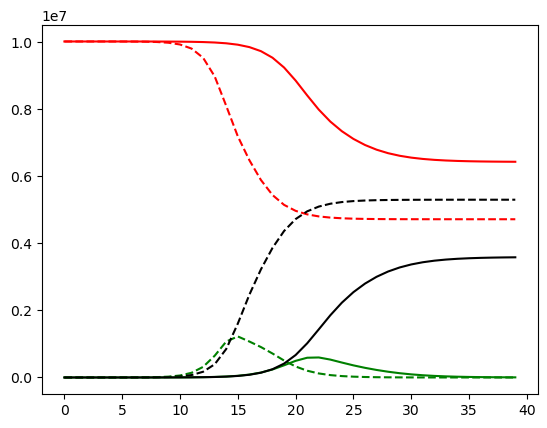

In [20]:
plt.plot(t,SS,color='red',linestyle='dashed')
plt.plot(t,II,color='green',linestyle='dashed')
plt.plot(t,RR,color='black',linestyle='dashed')
plt.plot(t,SS_,color='red')
plt.plot(t,II_,color='green')
plt.plot(t,RR_,color='black')

In [10]:
RR

array([0.00000000e+00, 1.83265711e+01, 4.34632476e+01, 9.11006898e+01,
       1.93458867e+02, 4.25480851e+02, 9.65757137e+02, 2.24372368e+03,
       5.29404898e+03, 1.26102669e+04, 3.01747514e+04, 7.21496097e+04,
       1.70901963e+05, 3.94003378e+05, 8.51373172e+05, 1.60785816e+06,
       2.47077492e+06, 3.22683135e+06, 3.86657296e+06, 4.37053582e+06,
       4.72669758e+06, 4.95761670e+06, 5.09965872e+06, 5.18452624e+06,
       5.23448046e+06, 5.26368481e+06, 5.28072004e+06, 5.29065873e+06,
       5.29646510e+06, 5.29986352e+06, 5.30185639e+06, 5.30302712e+06,
       5.30371595e+06, 5.30412179e+06, 5.30436116e+06, 5.30450248e+06,
       5.30458596e+06, 5.30463531e+06, 5.30466449e+06, 5.30468176e+06,
       5.30469198e+06, 5.30469802e+06, 5.30470160e+06, 5.30470372e+06,
       5.30470498e+06, 5.30470572e+06, 5.30470616e+06, 5.30470642e+06,
       5.30470658e+06, 5.30470667e+06, 5.30470672e+06, 5.30470675e+06,
       5.30470677e+06, 5.30470678e+06, 5.30470679e+06, 5.30470679e+06,
      

In [11]:
I0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
np.sum(beta1)

17.259213950778182

In [13]:
np.sum(flowin-flowin1)/np.sum(flowin)

0.3000000000000001

In [14]:
np.sum(flowin)

3353.4183296130955

In [15]:
np.sum(flowin1)

2347.3928307291667

In [16]:
RR

array([0.00000000e+00, 1.83265711e+01, 4.34632476e+01, 9.11006898e+01,
       1.93458867e+02, 4.25480851e+02, 9.65757137e+02, 2.24372368e+03,
       5.29404898e+03, 1.26102669e+04, 3.01747514e+04, 7.21496097e+04,
       1.70901963e+05, 3.94003378e+05, 8.51373172e+05, 1.60785816e+06,
       2.47077492e+06, 3.22683135e+06, 3.86657296e+06, 4.37053582e+06,
       4.72669758e+06, 4.95761670e+06, 5.09965872e+06, 5.18452624e+06,
       5.23448046e+06, 5.26368481e+06, 5.28072004e+06, 5.29065873e+06,
       5.29646510e+06, 5.29986352e+06, 5.30185639e+06, 5.30302712e+06,
       5.30371595e+06, 5.30412179e+06, 5.30436116e+06, 5.30450248e+06,
       5.30458596e+06, 5.30463531e+06, 5.30466449e+06, 5.30468176e+06,
       5.30469198e+06, 5.30469802e+06, 5.30470160e+06, 5.30470372e+06,
       5.30470498e+06, 5.30470572e+06, 5.30470616e+06, 5.30470642e+06,
       5.30470658e+06, 5.30470667e+06, 5.30470672e+06, 5.30470675e+06,
       5.30470677e+06, 5.30470678e+06, 5.30470679e+06, 5.30470679e+06,
      

In [17]:
RR_

array([0.00000000e+00, 1.83265711e+01, 3.75448713e+01, 6.41467391e+01,
       1.05882571e+02, 1.75174964e+02, 2.93572032e+02, 4.99279369e+02,
       8.60329374e+02, 1.49811056e+03, 2.62928320e+03, 4.64041038e+03,
       8.22018485e+03, 1.45918273e+04, 2.59153642e+04, 4.59645101e+04,
       8.12046888e+04, 1.42322910e+05, 2.45838794e+05, 4.14145899e+05,
       6.69896942e+05, 1.01992257e+06, 1.43519162e+06, 1.85612803e+06,
       2.23246866e+06, 2.54656771e+06, 2.80117867e+06, 3.00401101e+06,
       3.16239866e+06, 3.28316810e+06, 3.37306160e+06, 3.43856545e+06,
       3.48548764e+06, 3.51866739e+06, 3.54191067e+06, 3.55808638e+06,
       3.56929298e+06, 3.57703366e+06, 3.58236992e+06, 3.58604413e+06,
       3.58857215e+06, 3.59031088e+06, 3.59150655e+06, 3.59232878e+06,
       3.59289426e+06, 3.59328323e+06, 3.59355082e+06, 3.59373496e+06,
       3.59386170e+06, 3.59394895e+06, 3.59400903e+06, 3.59405041e+06,
       3.59407892e+06, 3.59409856e+06, 3.59411209e+06, 3.59412142e+06,
      

In [21]:
gamma

0.7048681176153797

In [24]:
import csv
file_path = 'covid-data/beta.csv'

# Save the array to a CSV file
with open(file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(beta)